# Importing Libraries

In [1]:
# !pip install tensorflow
# !pip install opencv-python

In [1]:
import numpy as np
import tensorflow as tf, keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [3]:
# !pip uninstall tensorflow

In [4]:
# !pip install tensorflow==2.11.0

# Loading Model

In [5]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.h5')

#Visualising and Performing Prediction on Single image

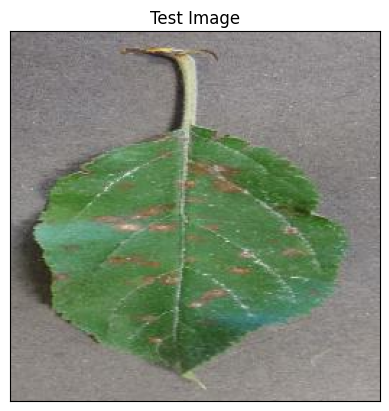

In [11]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [12]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 18ms/step


In [13]:
print(predictions)

[[2.27714103e-04 2.18061427e-06 9.79367457e-03 1.00879583e-06
  1.19582194e-06 1.61215257e-06 3.41805562e-09 1.70704952e-05
  1.72067083e-09 2.24243344e-08 2.90900387e-10 9.87901092e-01
  1.12496875e-03 4.73031432e-05 4.64134359e-07 7.80849163e-08
  2.08820438e-05 1.71244585e-06 1.40940174e-04 2.88743848e-07
  1.19825287e-07 7.99922509e-06 1.88795909e-07 1.52866804e-07
  6.21787466e-09 9.48321031e-08 7.10210270e-06 1.53074822e-07
  2.58752448e-06 5.89436735e-04 1.64804669e-06 7.19427760e-07
  2.18897894e-05 1.02903556e-07 8.50297874e-05 1.53288696e-07
  2.18727820e-07 7.95443995e-08]]


In [14]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

11


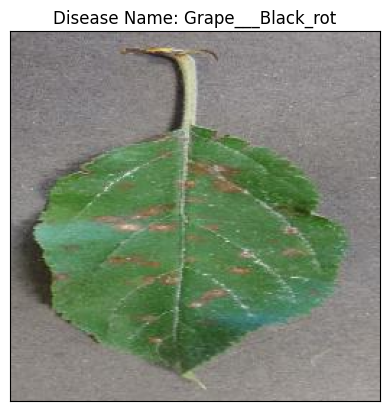

In [15]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()